# ¿Existe convergencia en los tipos de gastos entre regiones?

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
spending = pd.read_pickle("../data/interim/data_spending.pickle")

In [39]:
spending = spending.reset_index().assign(period = lambda df: df.period.map(lambda y: int(y.left))).set_index(spending.index.names)

In [40]:
#Agregando los gastos totales de todas las regiones
gastos_x_periodo = spending.stack([1,2]).sum(axis = 1).unstack(-1)['USE_Devengado'].unstack().sum(axis = 1).unstack(-1)

In [41]:
#Variacion de gastos
var_gastos = (gastos_x_periodo/gastos_x_periodo.shift(1, axis = 1))**(1/5)-1

In [42]:
#Agregando bases (las variables son el crecimiento y el log del  lag del monto)

In [43]:
data_conv = pd.concat([np.log(gastos_x_periodo.shift(1, axis = 1)),var_gastos], axis = 1, keys = ['level', 'growth']).stack()

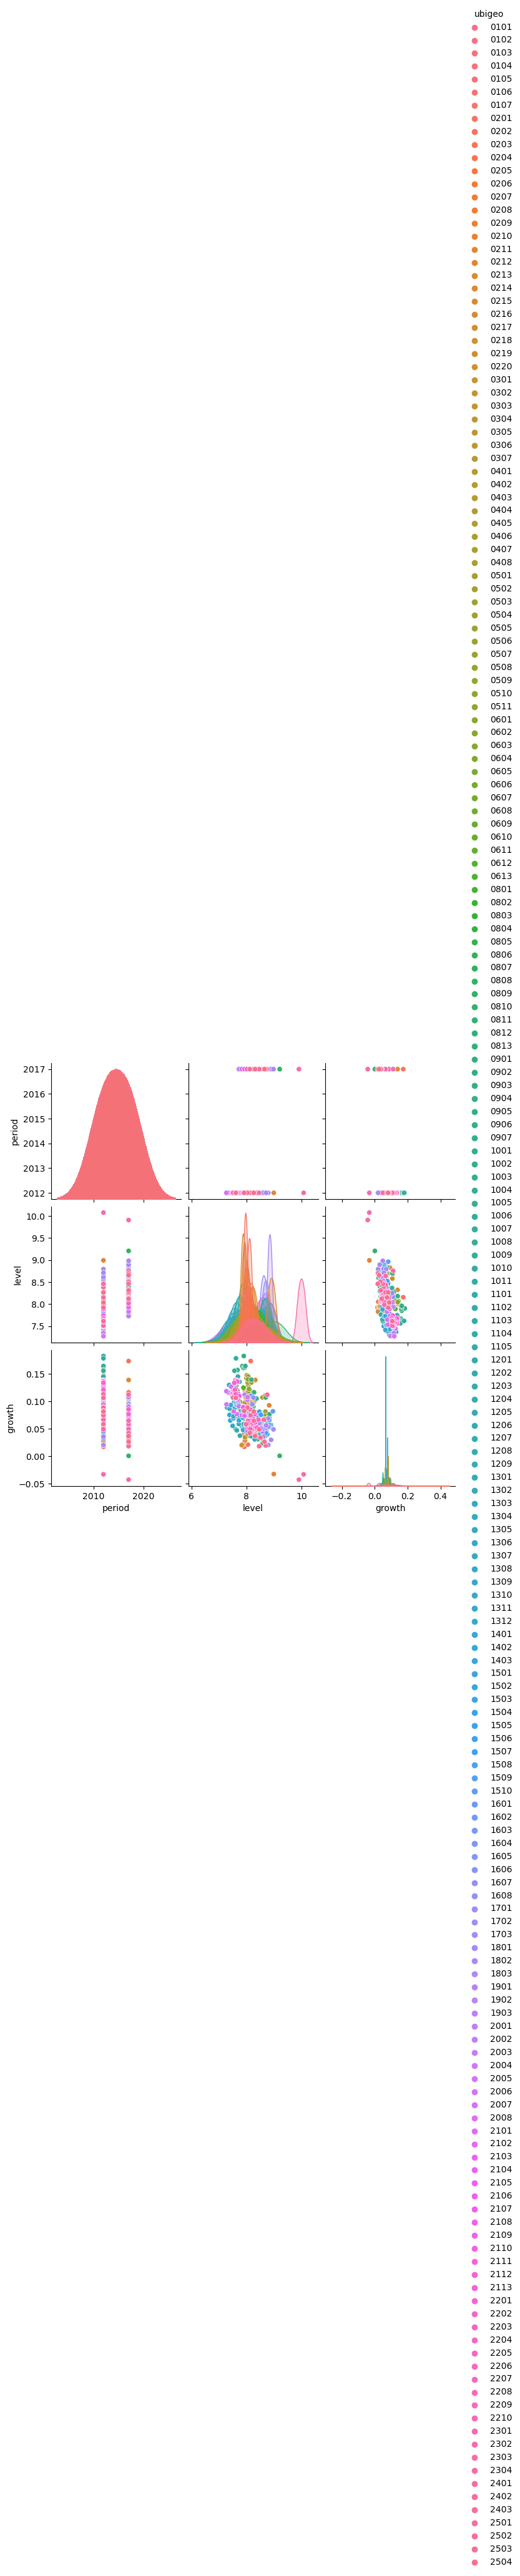

In [60]:
sns.pairplot(data_conv.reset_index(), hue = 'ubigeo')

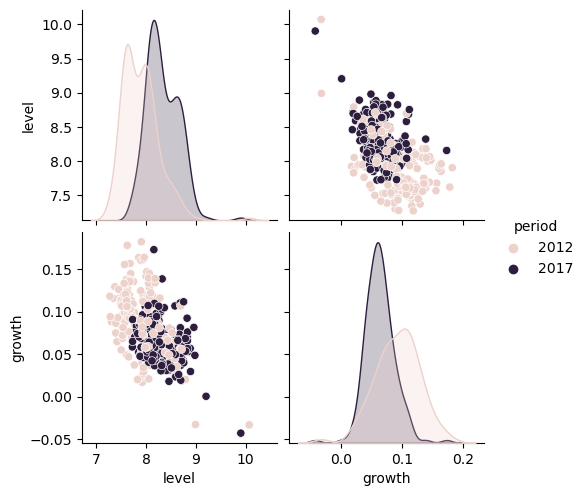

In [58]:
sns.pairplot(data_conv.reset_index(), hue = 'period')

##### Regresion de convergencia incondicial

$\Delta y_t^i = \alpha + \beta y_{t-1}^i + \epsilon_t^i$

In [45]:
#Regresion pool

In [46]:
import statsmodels.api as sm

In [47]:
exog = sm.add_constant(data_conv[['level']], prepend=False)

In [48]:
endog = data_conv[['growth']]

In [49]:
mod = sm.OLS(endog, exog)

In [50]:
res = mod.fit()

In [51]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     174.7
Date:                Fri, 26 May 2023   Prob (F-statistic):           3.56e-33
Time:                        06:39:57   Log-Likelihood:                 834.52
No. Observations:                 389   AIC:                            -1665.
Df Residuals:                     387   BIC:                            -1657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
level         -0.0466      0.004    -13.218      0.0

In [52]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects

$\Delta y_t^i = \alpha_i + \beta y_{t-1}^i + \epsilon_t^i$

In [54]:
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 growth   R-squared:                        0.5847
Estimator:                   PanelOLS   R-squared (Between):             -0.7674
No. Observations:                 389   R-squared (Within):               0.5847
Date:                Fri, May 26 2023   R-squared (Overall):              0.0689
Time:                        06:39:59   Log-likelihood                    1026.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      271.67
Entities:                         195   P-value                           0.0000
Avg Obs:                       1.9949   Distribution:                   F(1,193)
Min Obs:                       1.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             271.67
                            

$\Delta y_t^i = \alpha_i + \rho_t + \beta y_{t-1}^i + \epsilon_t^i$

In [55]:
model_fe_te = PanelOLS(endog, exog, entity_effects = True, time_effects=True) 
fe_te_res = model_fe_te.fit() 
#print results
print(fe_te_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 growth   R-squared:                        0.7182
Estimator:                   PanelOLS   R-squared (Between):             -9.9171
No. Observations:                 389   R-squared (Within):              -0.8888
Date:                Fri, May 26 2023   R-squared (Overall):             -4.3485
Time:                        06:41:14   Log-likelihood                    1170.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      489.40
Entities:                         195   P-value                           0.0000
Avg Obs:                       1.9949   Distribution:                   F(1,192)
Min Obs:                       1.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             489.40
                            